In [1]:
##imports

import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.transform import Rotation as R
from lxml import etree
import sys
from utils import *

In [2]:
# ## generate locations of markers

# mode='single_multi_angle'
# if(mode=='full_sphere'):
#     r=2
#     lin_phi = np.linspace(0, 2*np.pi, 18) # causes last markers overlap first ones 
#     lin_theta = np.linspace(-0.45*np.pi, 0.45*np.pi, 10) # if we go up to pi/2 markers will overlap at poles
# elif (mode=='dome'):
#     r=2
#     lin_phi = np.linspace(0, 2*np.pi, 8)
#     lin_theta = np.linspace(15/180*np.pi, 0.5*np.pi-20/180*np.pi, 3)
# elif (mode=='single_multi_angle'):
#     r = np.random.uniform(1, 2, 1)
#     theta = np.random.uniform(20/180*np.pi,30/180*np.pi,5)
#     phi = np.random.uniform(-10/180*np.pi,10/180*np.pi,5)
# else:
#     raise BaseException("none of the options chosen")
    
# lin_phi = lin_phi[:-1] #disgard last element as it is overlaid over other marker

# _theta, _phi = np.meshgrid(lin_theta, lin_phi)
# x = (r*np.cos(_theta)*np.cos(_phi)).flatten()
# y = (r*np.cos(_theta)*np.sin(_phi)).flatten()
# z = (r*np.sin(_theta)).flatten()
# theta=_theta.flatten()
# phi=_phi.flatten()

In [3]:
main_point = [1, 0, 0.5]

num = 20
r = np.random.uniform(0.8, 1.1, num)
theta = np.random.uniform(15/180*np.pi,45/180*np.pi,num)
phi = np.random.uniform(-20/180*np.pi,20/180*np.pi,num)
x, y, z, = [], [], []
for i in range(len(r)):
    _r = r[i]
    _theta = theta[i]
    _phi = phi[i]
    x.append((_r*np.cos(_theta)*np.cos(_phi)))
    y.append((_r*np.cos(_theta)*np.sin(_phi)))
    z.append((_r*np.sin(_theta)))

In [10]:
poses = []
for i in range(len(x)):
    _x, _y, _z = x[i], y[i], z[i]
    dx = main_point[0]-_x
    dy = main_point[1]-_y
    dz = main_point[2]-_z
    directionA = [0, 0, 1]
    directionB = np.array([dx, dy, dz])
    directionA = directionA/np.linalg.norm(directionA)
    directionB = directionB/np.linalg.norm(directionB)
    
    rot_angle = np.arccos(np.dot(directionA, directionB))
    rot_axis = np.cross(directionA, directionB)
    
    r = R.from_rotvec(rot_axis/rot_angle)
    H = merge_H_transform(r.as_matrix(), [_x, _y, _z])
    

    poses.append(H.flatten())
print(poses)

np.savetxt('poses_single_marker.csv', poses, delimiter=',')

[array([ 0.98451935, -0.06100518,  0.16431679,  0.96613907, -0.06100518,
        0.75959449,  0.64752959, -0.13343708, -0.16431679, -0.64752959,
        0.74411385,  0.46563991,  0.        ,  0.        ,  0.        ,
        1.        ]), array([ 0.83784477, -0.03477867,  0.54479958,  0.71922602, -0.03477867,
        0.99254075,  0.11684734, -0.06021974, -0.54479958, -0.11684734,
        0.83038552,  0.53196857,  0.        ,  0.        ,  0.        ,
        1.        ]), array([ 0.66604047, -0.14264746,  0.73214875,  0.785461  , -0.14264746,
        0.93906957,  0.31272998, -0.09163818, -0.73214875, -0.31272998,
        0.60511004,  0.22154928,  0.        ,  0.        ,  0.        ,
        1.        ]), array([ 0.88620683,  0.01163353,  0.46314374,  0.72548345,  0.01163353,
        0.99881066, -0.04734905,  0.02806493, -0.46314374,  0.04734905,
        0.88501748,  0.60419882,  0.        ,  0.        ,  0.        ,
        1.        ]), array([ 0.95760844, -0.00406323,  0.28804439,  

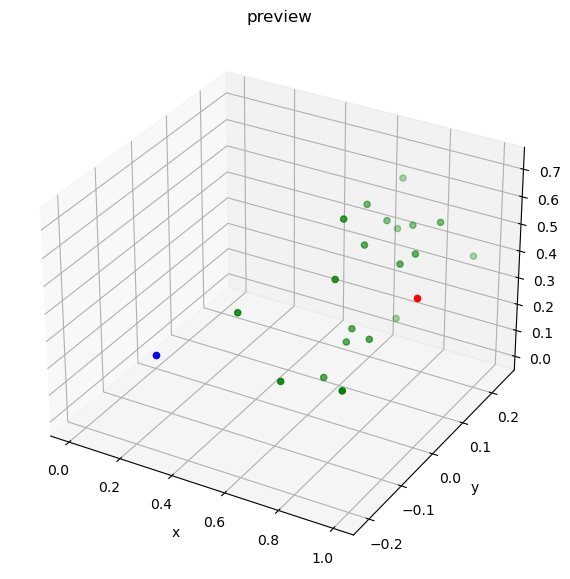

In [19]:
%matplotlib inline
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D([0], [0], [0], color='blue')
ax.scatter3D(main_point[0], main_point[1], main_point[2], color='red')
ax.scatter3D(x, y, z, color = "green")
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.title("preview")
 
# show plot
plt.show()

In [ ]:
## import XML tree from file

parser = etree.XMLParser(remove_blank_text=True)
tree = etree.parse("/home/armin/catkin_ws/src/arc/gazebo/sim/worlds/empty_backup.world", parser)
world_node=tree.xpath("//world")[0]

In [2]:
## generate XML for markers

num_markers = len(x)
print('There are {} markers to be positioned in the world'.format(num_markers))

for i in  range(num_markers):
    include_node=etree.Element("include")
    uri_node = etree.Element("uri")
    pose_node = etree.Element("pose")
    uri_node.text='model://marker_{}'.format(i+1)
    pose_node.text='{:.4f} {:.4f} {:.4f} {:.4f} {:.4f} {:.4f}'.format(x[i], y[i], z[i], 0, np.pi/2-theta[i], phi[i])
    print(pose_node.text)
    include_node.append(uri_node)
    include_node.append(pose_node)
    world_node.append(include_node)




NameError: name 'x' is not defined

In [30]:
## Export XML
text_file = open("markers_few.world", "w")
str=etree.tostring(tree, pretty_print=True).decode(sys.stdout.encoding)
text_file.write(str)
text_file.close()
